In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('survey.csv')

In [3]:
data.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [5]:
data.shape


(1259, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<Axes: xlabel='Country'>

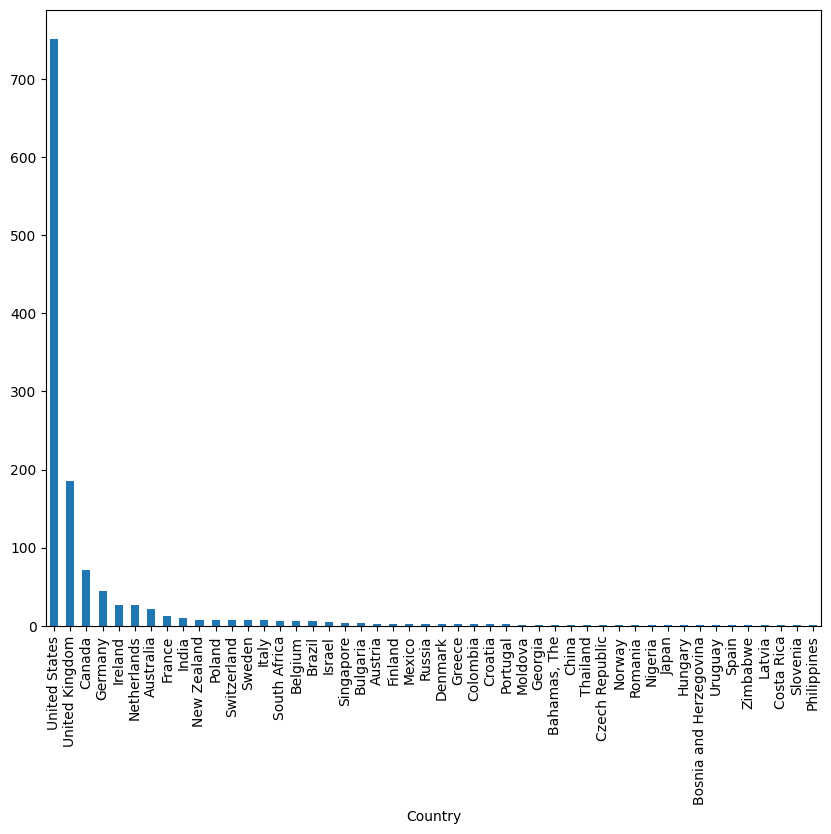

In [7]:
data['Country'].value_counts().plot(kind='bar', figsize=(10,8))

In [8]:
data.drop(['Country','state','comments','Timestamp'],axis=1,inplace=True)

In [9]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [10]:
data['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [11]:
data['self_employed']=data['self_employed'].fillna('No')
# df[col].method(value, inplace=True)  this format gives warning


In [12]:
data['work_interfere'].value_counts()


work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [13]:
data['work_interfere']=data['work_interfere'].fillna('N/A')

<Axes: xlabel='Age'>

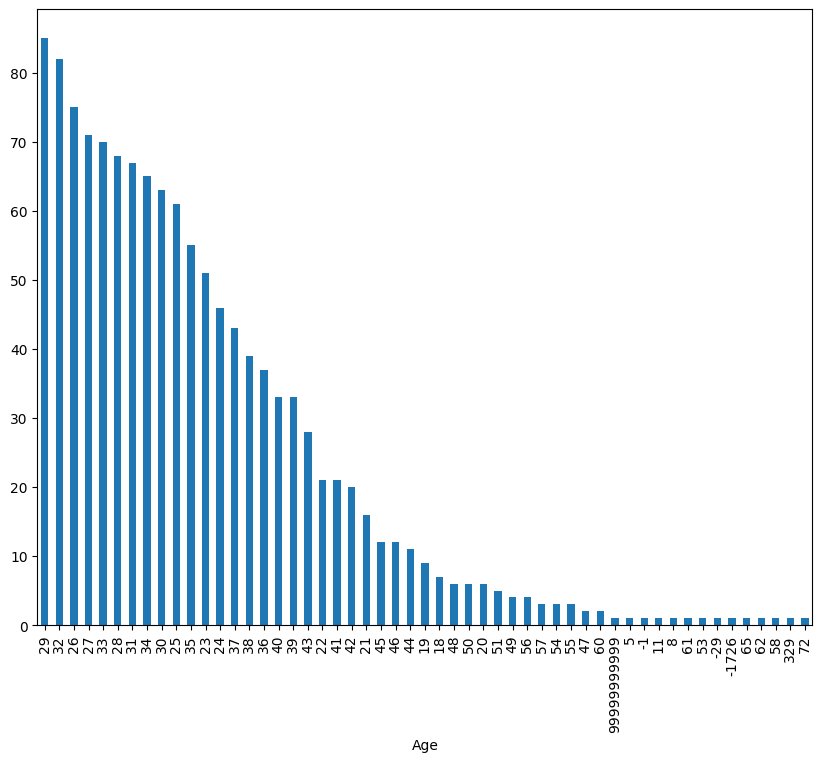

In [14]:
data['Age'].value_counts().plot(kind='bar', figsize=(10,8))

In [15]:
data.drop(data[(data['Age']>60)|(data['Age']<18)].index,inplace=True)

<Axes: xlabel='Gender'>

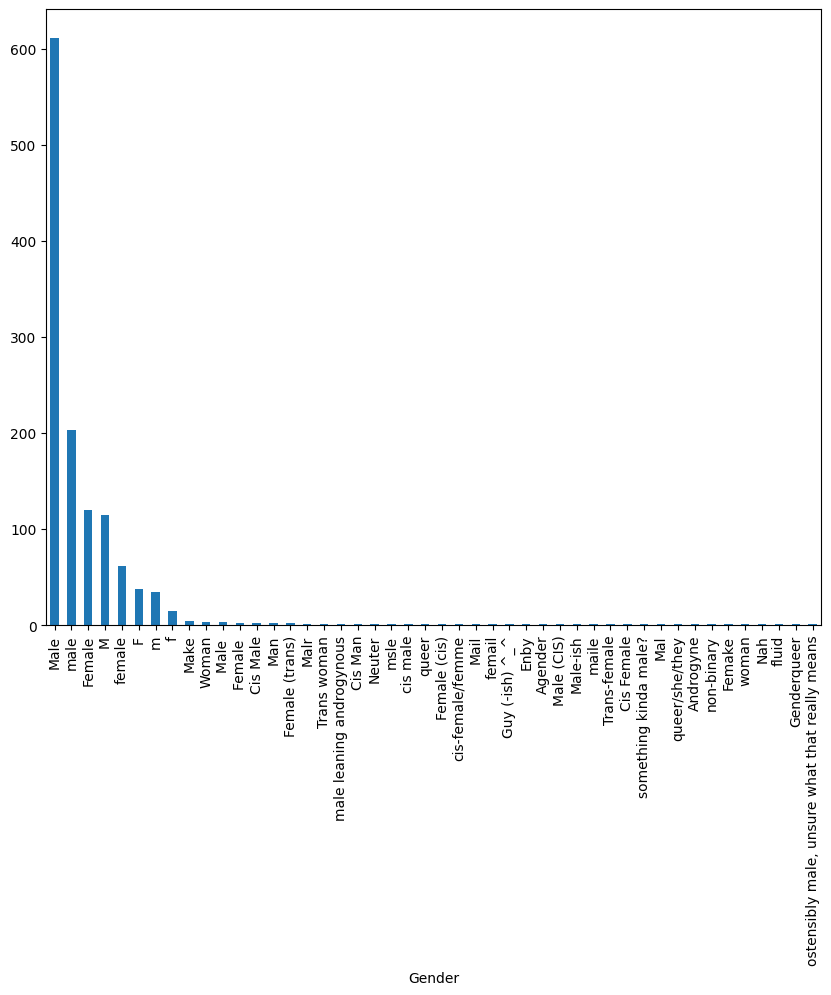

In [16]:
data['Gender'].value_counts().plot(kind='bar', figsize=(10,8))

In [17]:
data['Gender'].value_counts()



Gender
Male                                              611
male                                              203
Female                                            120
M                                                 115
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man              

In [18]:
data['Gender']=data['Gender'].replace(["Male", "M","male", "m","Male", "Male-ish", "Maile", "Mal",
                        "Male (CIS)", "Make", "Male ", "Man","msle", "Mail", "maile",
                        "Malr","Cis Man", "Cis Male", "cis male"],"Male")
data['Gender']=data['Gender'].replace(["Cis Female", "f","F", "Female","female", "Woman","woman",  "Femake", "Female ",
                        "Cis-female/femme", "cis-female/femme","Cis-female", "Female (cis)", "femail"],'Female')
data['Gender']=data['Gender'].replace(["Trans-female", "something kinda male?", "queer/she/they", "Non-binary","Nah",
                        "all", "Enby", "fluid", "Genderqueer", "Androgyne", "Agender", 
                        "male leaning androgynous", "Guy (-ish) ^_^", "Trans woman", "Neuter","non-binary",
                        "Female (trans)", "queer", "ostensibly male, unsure what that really means"],
                                      'Non-Binary')

In [19]:
data['Gender'].value_counts()

Gender
Male          983
Female        246
Non-Binary     18
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution - Age')

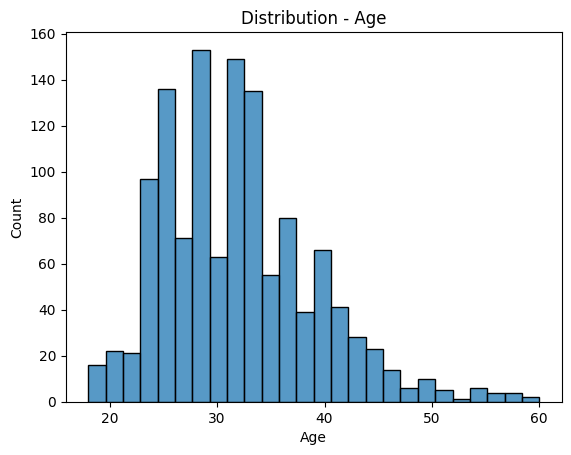

In [20]:
sb.histplot(data['Age'])
plt.title("Distribution - Age")


Text(0.5, 1.0, 'Employment Type')

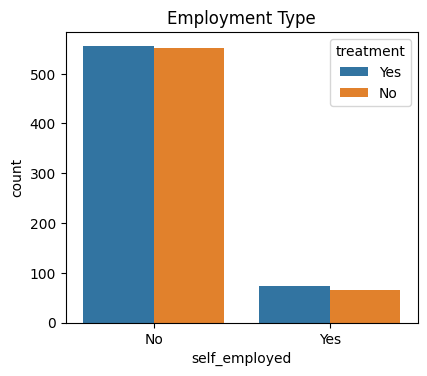

In [21]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
# sb.countplot(data['self_employed'],hue=data['treatment'])
sb.countplot(x='self_employed', hue='treatment', data=data)

plt.title('Employment Type')
# print(data.columns)


Text(0.5, 1.0, 'family_history')

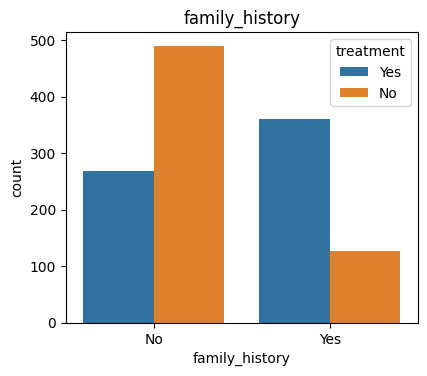

In [22]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sb.countplot(x='family_history', hue='treatment', data=data)

plt.title('family_history')

Text(0.5, 1.0, 'work_interfere')

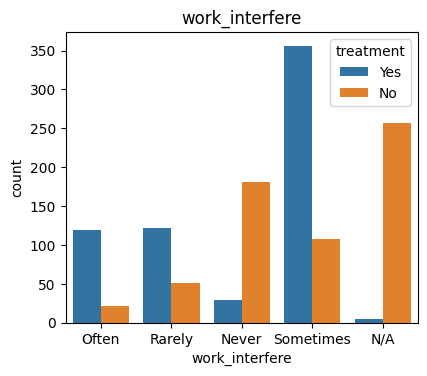

In [23]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sb.countplot(x='work_interfere', hue='treatment', data=data)

plt.title('work_interfere')

Text(0.5, 1.0, 'Work Type')

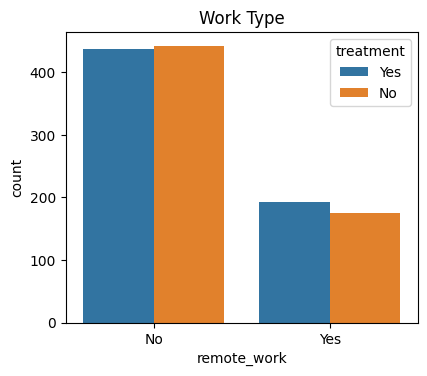

In [24]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sb.countplot(x='remote_work', hue='treatment', data=data)

plt.title('Work Type')

Text(0.5, 1.0, 'Company')

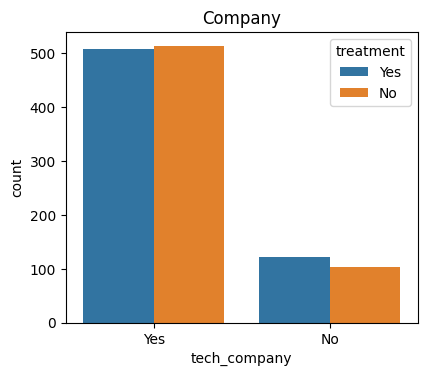

In [25]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sb.countplot(x='tech_company', hue='treatment', data=data)
plt.title('Company')

Text(0.5, 1.0, 'Benefits')

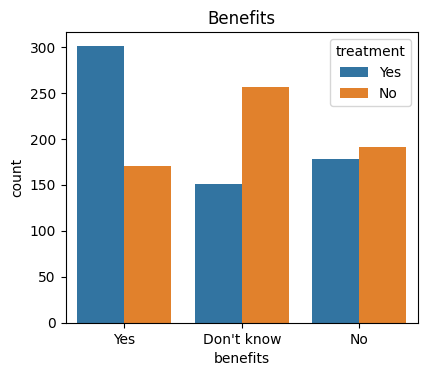

In [26]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sb.countplot(x='benefits', hue='treatment', data=data)
plt.title('Benefits')

Text(0.5, 1.0, 'Care Options')

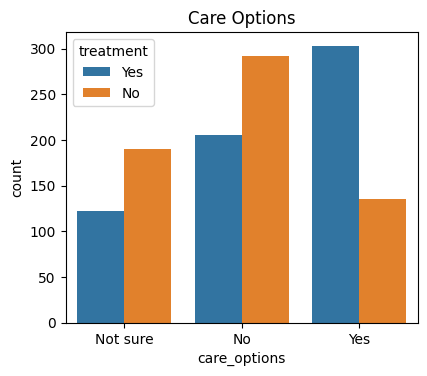

In [27]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sb.countplot(x='care_options', hue='treatment', data=data)
plt.title('Care Options')

Text(0.5, 1.0, 'mental_vs_physical')

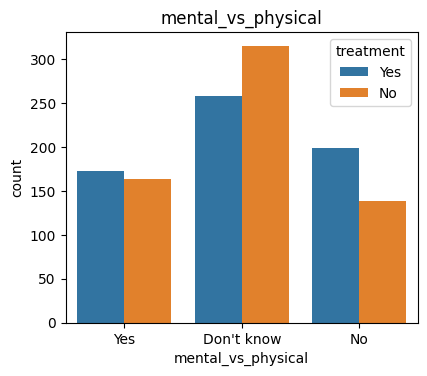

In [28]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(x='mental_vs_physical', hue='treatment', data=data)
plt.title('mental_vs_physical')

Text(0.5, 1.0, 'wellness_program')

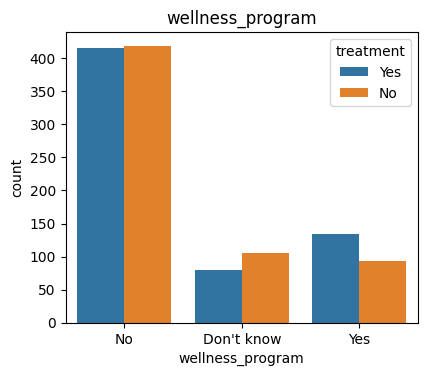

In [29]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sb.countplot(x='wellness_program', hue='treatment', data=data)
plt.title('wellness_program')

Text(0.5, 1.0, 'anonymity')

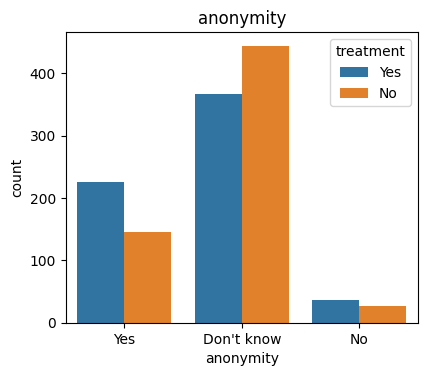

In [30]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sb.countplot(x='anonymity', hue='treatment', data=data)
plt.title('anonymity')

Text(0.5, 1.0, 'leave')

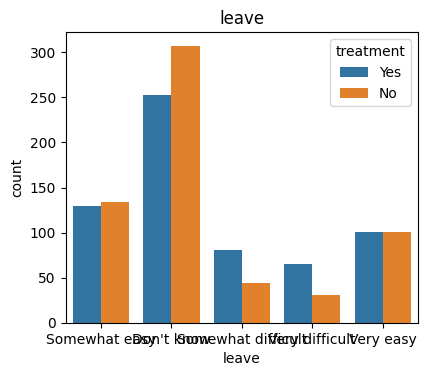

In [31]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,11)
sb.countplot(x='leave', hue='treatment', data=data)
plt.title('leave')

Text(0.5, 1.0, 'mental_health_consequence')

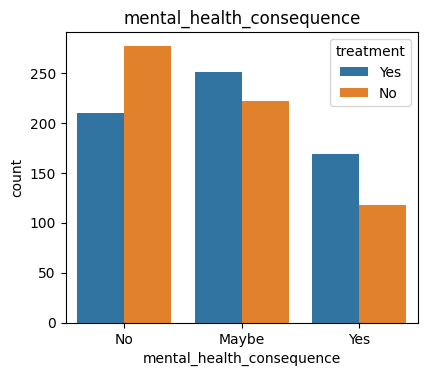

In [32]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sb.countplot(x='mental_health_consequence', hue='treatment', data=data)
plt.title('mental_health_consequence')

Text(0.5, 1.0, 'phys_health_consequence')

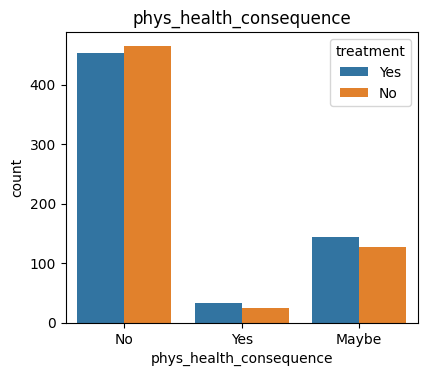

In [33]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sb.countplot(x='phys_health_consequence', hue='treatment', data=data)
plt.title('phys_health_consequence')

Text(0.5, 1.0, 'coworkers')

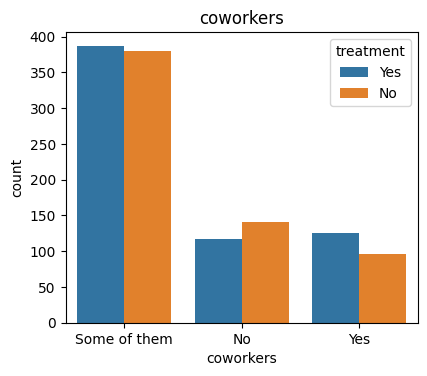

In [34]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sb.countplot(x='coworkers', hue='treatment', data=data)
plt.title('coworkers')

Text(0.5, 1.0, 'supervisor')

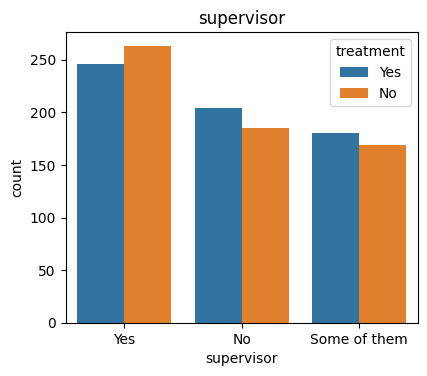

In [35]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sb.countplot(x='supervisor', hue='treatment', data=data)
plt.title('supervisor')

Text(0.5, 1.0, 'mental_health_interview')

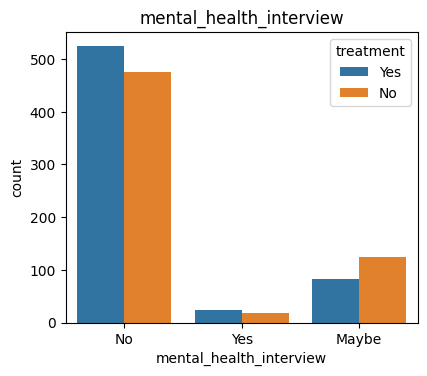

In [36]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sb.countplot(x='mental_health_interview', hue='treatment', data=data)
plt.title('mental_health_interview')

Text(0.5, 1.0, 'phys_health_interview')

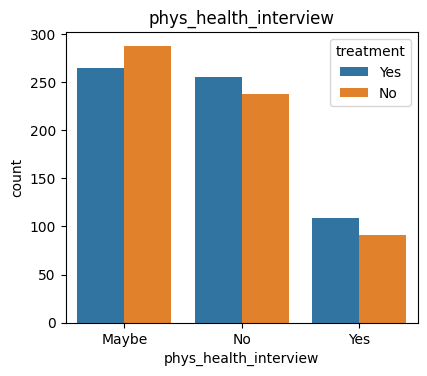

In [37]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sb.countplot(x='phys_health_interview', hue='treatment', data=data)
plt.title('phys_health_interview')

Text(0.5, 1.0, 'obs_consequence')

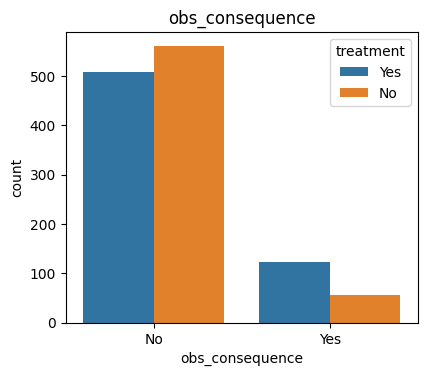

In [38]:

plt.figure(figsize=(10,40))
plt.subplot(9,2,18)
sb.countplot(x='obs_consequence', hue='treatment', data=data)
plt.title('obs_consequence')

In [39]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
x=data.drop('treatment',axis=1)

In [41]:
y=data['treatment']

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [43]:
x=data.drop('treatment',axis=1)
y=data['treatment']

In [44]:
data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [45]:
ct=ColumnTransformer([('oe',OrdinalEncoder(),['Gender', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'])],remainder='passthrough')

In [46]:
x=ct.fit_transform(x)

In [47]:
le=LabelEncoder()
y=le.fit_transform(y)

In [48]:
import joblib

In [49]:
joblib.dump(ct,'feature_values')

['feature_values']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=49)

In [51]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((872, 22), (375, 22), (872,), (375,))

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,classification_report,auc

In [53]:
d={}
d['lr']=LogisticRegression(solver='liblinear',random_state=49)
d['knnc']=KNeighborsClassifier()
d['dtc']=DecisionTreeClassifier(random_state=49)
d['rfc']=RandomForestClassifier(random_state=49)
d['abc']=AdaBoostClassifier(algorithm='SAMME',random_state=49)
d['gbc']=GradientBoostingClassifier(random_state=49)
d['xgbc']=XGBClassifier(random_state=49)

In [54]:
def test(x_train,x_test,y_train,y_test,m,mn):
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('=========================={}============================='.format(mn))
    print('Score is: {}'.format(accuracy))

In [55]:
for mn,m in d.items():
    test(x_train,x_test,y_train,y_test,m,mn)

==========================lr=============================
Score is: 0.848
==========================knnc=============================
Score is: 0.7813333333333333
==========================dtc=============================
Score is: 0.7946666666666666
==========================rfc=============================
Score is: 0.8533333333333334
==========================abc=============================
Score is: 0.8693333333333333
==========================gbc=============================
Score is: 0.84
==========================xgbc=============================
Score is: 0.84


In [56]:
abc1=AdaBoostClassifier(algorithm='SAMME',random_state=99)
abc1.fit(x_train,y_train)
pred_abc1=abc1.predict(x_test)
print("Accuracy of AdaBoost= ",accuracy_score(y_test,pred_abc1))

Accuracy of AdaBoost=  0.8693333333333333


In [57]:
from sklearn.model_selection import RandomizedSearchCV
params_abc1={'n_estimators':[int(x) for x in np.linspace(start=1,stop=50,num=15)],
             'learning_rate':[(0.97+x/100) for x in range(0,8)],
            }
abc1_random=RandomizedSearchCV(random_state=49,estimator=abc1,param_distributions=params_abc1,n_iter=50,cv=5,n_jobs=-1)

In [58]:
params_abc1

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [59]:
abc1_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(algorithm='SAMME',
                                                random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [60]:
abc1_random.best_params_

{'n_estimators': 46, 'learning_rate': 0.99}

In [61]:
abc1_tuned=AdaBoostClassifier(random_state=49,n_estimators=46,learning_rate=0.99)
abc1_tuned.fit(x_train,y_train)
pred_abc1_tuned=abc1_tuned.predict(x_test)
print('Acuuracy od ab(tuned)= ',accuracy_score(y_test,pred_abc1_tuned))

C:\Users\zeelk\OneDrive\Desktop\tf\tfvenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acuuracy od ab(tuned)=  0.8666666666666667


Text(50.722222222222214, 0.5, 'Actual')

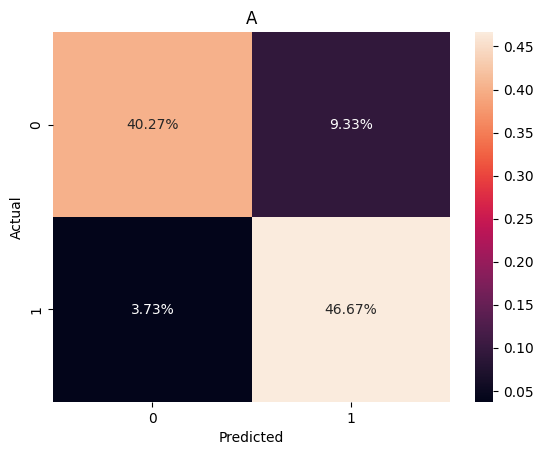

In [62]:
cf_matrix=confusion_matrix(y_test,pred_abc1)
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%')
plt.title('A')
plt.xlabel('Predicted')
plt.ylabel('Actual')

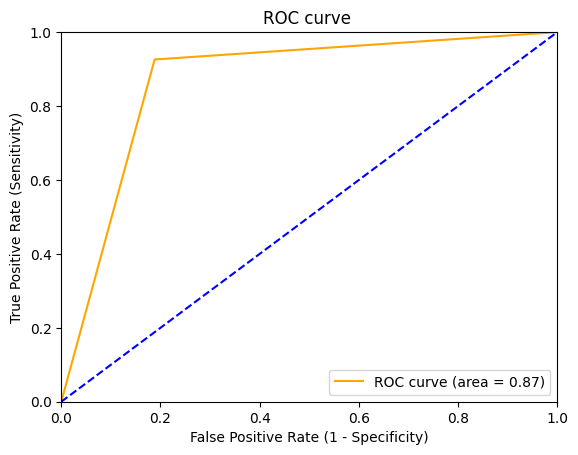

(array([0.        , 0.18817204, 1.        ]),
 array([0.        , 0.92592593, 1.        ]),
 array([inf,  1.,  0.]))

In [63]:
from sklearn import metrics
fpr,tpr,tr=roc_curve(y_test,pred_abc1)
roc_auc_abc=metrics.auc(fpr,tpr)
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# plt.rcParams['font.size'] = 12
plt.title('ROC curve ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc1)

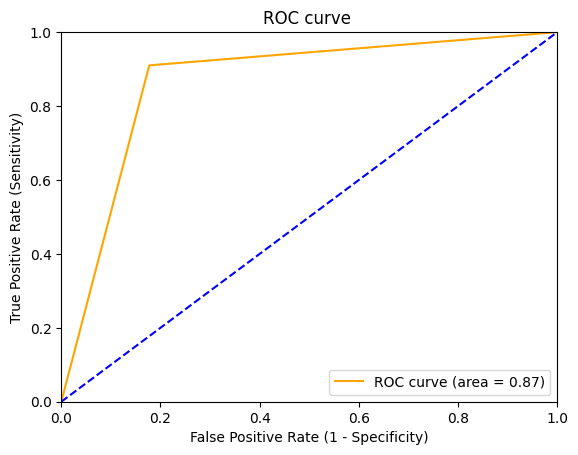

(array([0.        , 0.17741935, 1.        ]),
 array([0.        , 0.91005291, 1.        ]),
 array([inf,  1.,  0.]))

In [64]:
fprt,tprt,trt=roc_curve(y_test,pred_abc1_tuned)
roc_auc_abc_tuned=metrics.auc(fprt,tprt)
plt.plot(fprt, tprt, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc_tuned)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# plt.rcParams['font.size'] = 12
plt.title('ROC curve ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred_abc1_tuned)

In [65]:
print(classification_report(y_test,pred_abc1))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       186
           1       0.83      0.93      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [66]:
print(classification_report(y_test,pred_abc1_tuned))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       186
           1       0.84      0.91      0.87       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [67]:
import pickle 
pickle.dump('abc1_tuned',open('m.pkl','wb'))